# Properties of Networks

## Descriptive Properties of Networks

Remember that with a network, we can represent the collection of nodes and edges as an $n \times n$ adjacency matrix, where $n$ is the total number of nodes. The adjacency matrix looks like this:

\begin{align*}
    A &= \begin{bmatrix}
        a_{11} & ... & a_{1n} \\
        \vdots & \ddots & \vdots \\
        a_{n1} & ... & a_{nn}
    \end{bmatrix},
\end{align*}

Let's say you have a network representing the five boroughs of New York (Staten Island SI, Brooklyn BK, Queens Q, the Bronx BX, and Manhattan MH). The nodes in your network are the five boroughs. The edges $(i,j)$ of your network exist if one can travel from borough $i$ to borough $j$ along a bridge.

Below, you will look at a map of New York City, with the bridges connecting the different boroughs. In the middle, you look at this map as a network layout plot. The arrows indicate the direction of travel. On the right, you look at this map as an adjacency matrix:

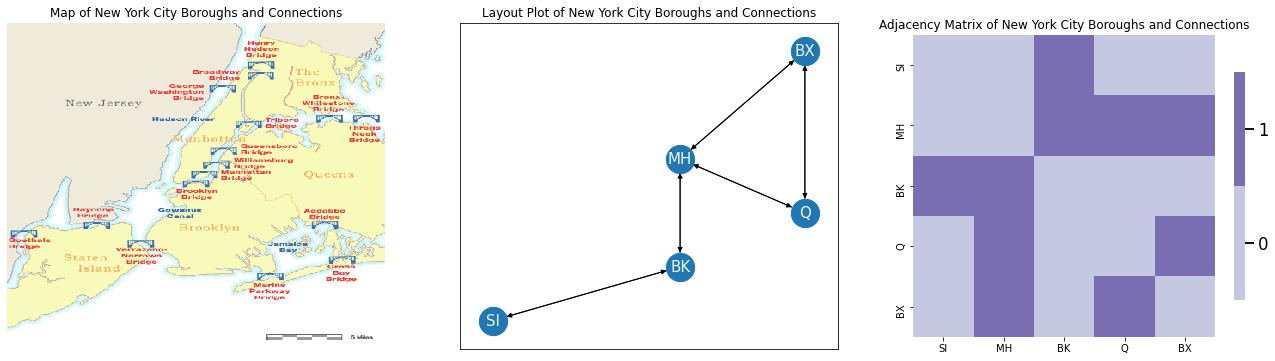

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from graphbook_code import heatmap

img = mpimg.imread('./img/newyork.png')

G = nx.DiGraph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

G.add_edge("BK", "SI")
G.add_edge("BK", "MH")
G.add_edge("Q", "MH")
G.add_edge("BX", "MH")
G.add_edge("BX", "Q")

A = nx.to_numpy_matrix(G)

fig, axs = plt.subplots(1,3, figsize=(23, 6))
axs[0].imshow(img, alpha=.8, interpolation='nearest', aspect='auto')
axs[0].axis('off')
axs[0].set_title("Map of New York City Boroughs and Connections")
nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[1].set_title("Layout Plot of New York City Boroughs and Connections")
heatmap(A.astype(int), ax=axs[2], xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
axs[2].set_title("Adjacency Matrix of New York City Boroughs and Connections")
axs[2].set_xticklabels(["SI", "MH", "BK", "Q", "BX"])
axs[2].set_yticklabels(["SI", "MH", "BK", "Q", "BX"])
fig;

### The edges of undirected networks are bi-directional

When you decide to travel from borough $i$ to borough $j$, you care about whether you can *actually drive* in that direction. In a similar way, the concept of directedness describes whether you need to worry about one-way bridges and bridge closures. If your network contains one-way bridges, then a bridge from borough $i$ to borough $j$ doesn't *necessarily* imply that a bridge from borough $j$ to borough $i$ exists (just ask New York drivers). If, for instance, the Brooklyn bridge was closed from Manhattan to Brooklyn, your network might change like this. Note that the red arrow going from Manhattan (MH) to Brooklyn (BK) is no longer present:

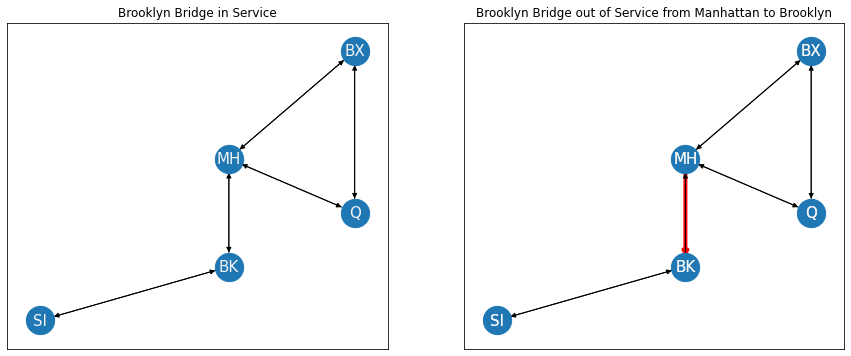

In [2]:
fig, axs=plt.subplots(1,2,figsize=(15, 6))

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[0].set_title("Brooklyn Bridge in Service")

G.remove_edge("MH", "BK")

G2 = nx.DiGraph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("MH", "BK")

nx.draw_networkx(G2, pos, ax=axs[1], with_labels=True, node_color="tab:blue",
                font_size=15, font_color="whitesmoke", arrows=True, edge_color="red",
                width=4)
nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[1].set_title("Brooklyn Bridge out of Service from Manhattan to Brooklyn")
fig;

In the context of this book, you will usually only worry about the undirected case, or when the presence of an arrow implies that the other direction exists, too. A network is **undirected** if an edge between node $i$ and node $j$ implies that node $j$ is also connected to node $i$. For this reason, you will usually omit the arrows entirely, like you show below:

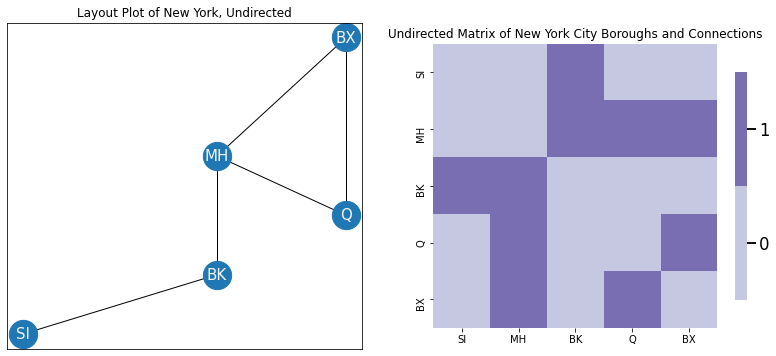

In [3]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

fig, ax = plt.subplots(1,2,figsize=(14,6))
nx.draw_networkx(G, pos, ax=ax[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
ax[0].set_title("Layout Plot of New York, Undirected")

A = nx.to_numpy_matrix(G)

heatmap(A.astype(int), ax=ax[1], xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
ax[1].set_title("Undirected Matrix of New York City Boroughs and Connections")
ax[1].set_xticklabels(["SI", "MH", "BK", "Q", "BX"]);
ax[1].set_yticklabels(["SI", "MH", "BK", "Q", "BX"]);

For the adjacency matrix $A$, remember an edge between nodes $i$ and $j$ is represented by the adjacency $a_{ij}$. This means that if the network is undirected, $a_{ij} = a_{ji}$, for all pairs of nodes $i$ and $j$. By definition, this tells us that the adjacency matrix $A$ is symmetric, so $A = A^\top$.

### Loopless networks do not have self-loops

If you are already in a borough, why would you want to take a bridge to that same borough? This logic relates to the concept of *self-loops* in a network. A **self-loop** in a network describes whether nodes can connect back to themselves. For instance, consider the following loop on Staten Island. This would have the interpretation of a bridge which connects Staten Island back to itself:

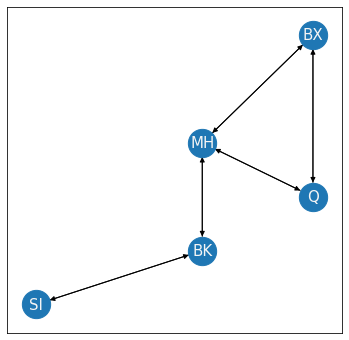

In [4]:
# TODO: add arrow from SI to SI
G = nx.DiGraph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

G.add_edge("BK", "SI")
G.add_edge("BK", "MH")
G.add_edge("Q", "MH")
G.add_edge("BX", "MH")
G.add_edge("BX", "Q")
G.add_edge("SI", "SI")

fig, ax = plt.subplots(1,1, figsize=(6,6))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)

In this example, the concept of self-loops is a little trite, but it is worth mentioning as you might see it arise elsewhere. A network is **loopless** if self-loops are not possible. For the adjacency matrix $A$, a self-loop would be represented by the adjacencies $a_{ii}$ for all nodes $i$. Note that these entries $a_{ii}$ are all of the *diagonal* entries of $A$. Therefore, for a network which is loopless, all adjacencies $a_{ii}$ on the diagonal *do not exist*. Mathematically, we will represent this by saying that the diagonal entries are $0$, but it is important to understand that if the network is loopless, there is a theoretical distinction between $0$ and *does not exist*. You might also see this property abbreviated by stating that the diagonal of the adjacency matrix is $0$, or $diag(A) = 0$. 

### Unweighted networks either have an edge, or they don't

Do you need to convey information about how long it takes to get from borough $i$ to borough $j$ with your network? This fundamental question underlies the concept of *weightedness* in networks. In a weighted network, you could use *edge-weights* $w(i, j)$ to describe the amount of time it takes to get from borough $i$ to borough $j$. An **edge-weight** $w(i,j)$ assigns a weight to an edge between nodes $i$ and $j$ if that edge exists. If you care about weightedness in the network, the network is called *weighted*. The potential edges $a_{ij}$ of $A$ for a weighted network take the value of the edge-weight; that is, $a_{ij} = w_{ij}$ for any edge which exists between nodes $i$ and $j$. In the below plot, edge-weight indicates the approximate time to travel from one borough to the other. The network is undirected, so you don't have to worry about directionality differences. The edge-weight is indicated by the number along the corresponding edge. You can also visualize edge-weights in terms of the adjacency matrix, which you show on the right:

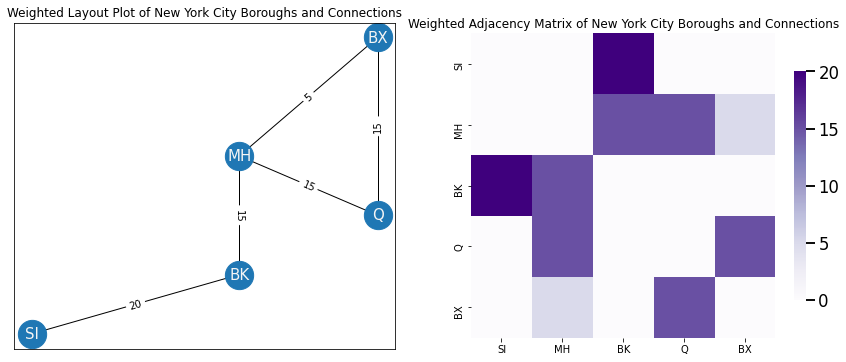

In [5]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK", weight=20)
G.add_edge("MH", "BK", weight=15)
G.add_edge("MH", "Q", weight=15)
G.add_edge("MH", "BX", weight=5)
G.add_edge("Q", "BX", weight=15)

fig, axs = plt.subplots(1,2, figsize=(15,6))
nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
labels = nx.get_edge_attributes(G,'weight');
nx.draw_networkx_edge_labels(G,pos, ax=axs[0], edge_labels=labels);

A = nx.to_numpy_matrix(G)

axs[0].set_title("Weighted Layout Plot of New York City Boroughs and Connections")
heatmap(A.astype(float), ax=axs[1], xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
axs[1].set_title("Weighted Adjacency Matrix of New York City Boroughs and Connections")
axs[1].set_xticklabels(["SI", "MH", "BK", "Q", "BX"]);
cbar = axs[1].collections[0].colorbar
cbar.set_ticks([0, 5, 10, 15, 20])
cbar.set_ticklabels([0, 5, 10, 15, 20])
axs[1].set_yticklabels(["SI", "MH", "BK", "Q", "BX"]);

For most examples in this book, you will usually discuss *unweighted* or *binary* networks. A network is **unweighted** or **binary** if you only care about whether edges are *present* or *absent*. In an unweighted network, a potential edge $a_{ij}$ takes the value $1$ if there is an edge from node $i$ to node $j$, and takes the value $0$ if there is *not* an edge from node $i$ to node $j$.


```{admonition} This book considers *simple networks*
A **simple network** is loopless, undirected, and unweighted. Most of the examples and techniques you look at in this book are developed in the context of simple networks. Fortunately, this note is largely conceptual, and doesn't really impact much from an implementation perspective. All the techniques and packages you use will make sensible choices, or will directly extend, to cases that fall outside of this particular setup. If your networks don't satisfy one or any of these properties, most of the approaches discussed herein will still work. If the technique will not work for the network you have provided, the software package used, `graspologic`, will either give you a warning or an explicit error if there is a substantial issue with the network you have provided.
```

## Descriptive Properties of Nodes

Just like you have many words and properties which describe the network itself, you also have special vocabulary in network machine learning to describe properties about the individual nodes in the network. We'll learn some of the ones here that will come up again later in the book.

### Node neighbors and incidences

You begin by descrcibing properties of single nodes in a simple network. The simplest property of a network is *adjacency*. A pair of nodes $i$ and $j$ in an undirected network are **neighbors** if an edge exists between them. In terms of the adjacency matrix, two nodes $i$ and $j$ are neighbors if the potential edge $a_{ij}$ is one. For instance, in the New York City example, the nodes SI and BK are adjacent/neighbors due to the presence of the green edge, shown in the figure:

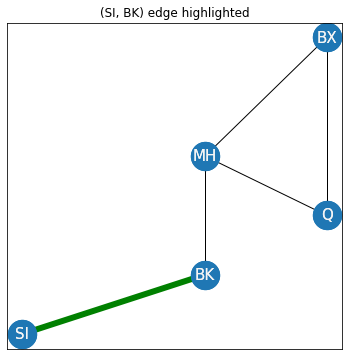

In [6]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

G2 = nx.Graph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("SI", "BK")

fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", width=6, edge_color="green", arrows=False)
ax.set_title("(SI, BK) edge highlighted")
fig;

These two nodes are *neighbors* of one another due to the fact that an edge exists between them.

### Node degree quantifies the number of edges

The simplest summary statistic for a node is known as the *node degree*. The **node degree** of $i$ in a simple network is the number of nodes with which it is a neighbor. Remember that if two nodes are not neighbors, the adjacency matrix entry corresponding to this *potential* edge takes a value of zero. This means that we can just count the potential edges $a_{ij}$ for a node $i$ to get its degree. We do this by just summing the $i^{th}$ row (or equivalently, if the network is simple, its $i^{th}$ column):

\begin{align*}
    degree(i) &= \sum_{j = 1}^n a_{ij} = \sum_{j = 1}^n a_{ji}
\end{align*}

Now you might be thinking, this isn't just counting edges which exist, since it counts *every* potential edge for node $i$. Let's see how that holds up. Remember that if an edge exists, $a_{ij}$ takes a value of $1$, whereas if an edge does not exist, $a_{ij}$ takes a value of $0$. This means that every $a_{ij}$ is either zero or one, so you can write:

\begin{align*}
    degree(i) &= \sum_{j = 1}^n a_{ij} \\
    &= \sum_{j : a_{ij} = 1} a_{ij} + \sum_{j : a_{ij} = 0}a_{ij}
    &= \sum_{j : a_{ij} = 1}1 + 0
\end{align*}
Note that in the left sum, since every $a_{ij}$ is defined to be one, that this is just the number of times that $a_{ij}$ takes a value of one, which is all of the edges that node $i$ touches. The right sum has every $a_{ij}$ defined to be zero, so this is just zero!

For instance, if you consider the node BK in your example, BK touches two edges, indicated in green, so $degree(v_{BK}) = 2$. When you look at the corresponding adjacency matrix, if you sum the entries for node $v_{BK}$, you also get two. The entries which would be summed row-wise or column wise for $v_{BK}$ are shown in blue:

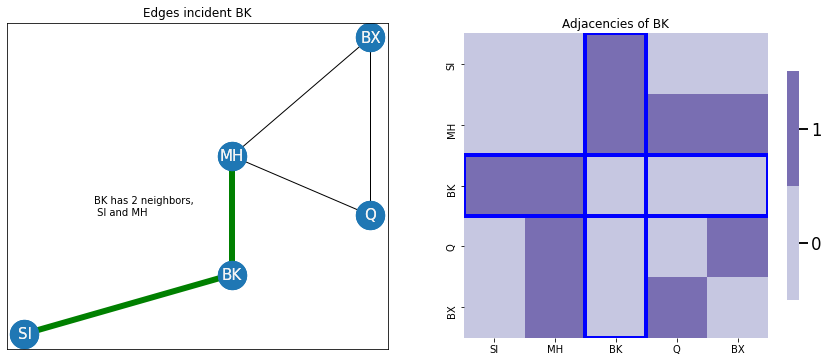

In [8]:
import matplotlib.patches as patches

G2 = nx.Graph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("SI", "BK")
G2.add_edge("MH", "BK")

fig, ax = plt.subplots(1,2,figsize=(15,6))
nx.draw_networkx(G, pos, ax=ax[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=ax[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", width=6, edge_color="green", arrows=False)
ax[0].set_title("Edges incident BK")

A = nx.to_numpy_matrix(G)
heatmap(A.astype(int), ax=ax[1], color="sequential", xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
ax[1].set_title("Adjacencies of BK")
ax[1].set_xticklabels(["SI", "MH", "BK", "Q", "BX"])
ax[1].set_yticklabels(["SI", "MH", "BK", "Q", "BX"])

ax[0].text(2, 3, s="BK has 2 neighbors,\n SI and MH", color="black")
ax[1].add_patch(
     patches.Rectangle(
         (2,0),
         1.0,
         5.0,
         edgecolor='blue',
         fill=False,
         lw=4
     ) )

ax[1].add_patch(
     patches.Rectangle(
         (0,2),
         5.0,
         1.0,
         edgecolor='blue',
         fill=False,
         lw=4
     ) );

as you saw earlier, it really doesn't matter whether you sum row or column-wise, as long as you pick one! 

### The degree matrix indicates the degrees of each node

A useful quantity which you will come across in many of the later chapters of this book is called the *degree matrix* of the network. The degree matrix is the *diagonal* matrix:
\begin{align*}
    D &= \begin{bmatrix}
        d_1 & 0 & ... & 0 \\
        0 & \ddots & \ddots& \vdots \\
        \vdots & \ddots & \ddots & 0 \\
        0 & ... & 0 & d_n
    \end{bmatrix}, \;\;\; d_i = degree(i)
\end{align*}
This matrix $D$ is called **diagonal** because all of the entries $d_{ij} = 0$ unless $i = j$. The diagonal entries $d_{ii}$ of the degree matrix are simply the node degrees $degree(i)$ for each node $i$. Using the counting procedure you described above, you can see that the node SI has degree one, the node BK has degree two, the node MH has degree three, the node Q has degree two, and the node BX has degree two. Therefore, the degree matrix is:

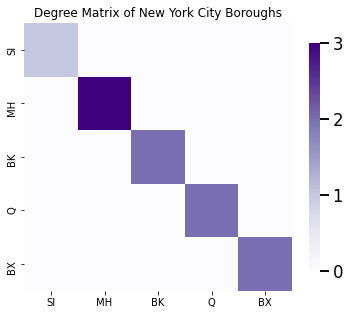

In [12]:
import numpy as np

n = 5
A = np.zeros((n, n))
A[0,0] = 1
A[1,1] = 3
A[2,2] = 2
A[3,3] = 2
A[4,4] = 2

fig, ax = plt.subplots(1,1, figsize=(6,6))
heatmap(A.astype(float), ax=ax, xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels([0, 1, 2, 3])
ax.set_title("Degree Matrix of New York City Boroughs")
ax.set_xticklabels(["SI", "MH", "BK", "Q", "BX"]);
ax.set_yticklabels(["SI", "MH", "BK", "Q", "BX"]);

## Network summary statistics tell us useful attributes about networks

When you learn about networks, it is often valuable to compute properties of the network so that you can get a better understanding of the relationships within it. You will call these properties *network summary statistics*. Although this book will focus more on *learned* representations of networks, summary statistics are a sort of *engineered* representation. You will learn several network summary statistics, and in the next chapter, we will explore the [limitations of network summary statistics](#link?).

### The network density indicates the fraction of possible edges which exist

Given the adjacency matrix $A$ of a simple network, what fraction of the possible edges *actually* exist? 

To understand this quantity, first you need to understand how many edges are possible in a network. You have $n$ total nodes in the network, so $A$ is an $n \times n$ matrix. Therefore, $A$ has $n^2$ total entries. However, it turns out that over *half* of these entries are redundant for simple networks. Since you are assuming the network is simple, the network is by definition loopless. This means that every entry is *by default* $0$ along the diagonal. Since each node $i$ has a corresponding diagonal entry $a_{ii}$, this comes to $n$ entries that you do not need to count. This leaves your total possible number of edges at $n^2$ (the total number of entries in the matrix $A$) minus $n$ (the total number of entries which are automatically $0$), or $n^2 - n = n(n - 1)$. This quantity represents the total number of possible edges which are *not* in the diagonal.

What else are you overcounting? Well, as it turns out, if the network is also *undirected* (which it is, because it is *simple*), every node that is *not* in the diagonal is also being double counted. Why is this? Remember that an undirected network has an adjacency matrix where for every pair of nodes $i$ and $j$, $a_{ij} = a_{ji}$. This means that you overcount the number of possible edges not in the diagonal by a factor of *two*, since each off-diagonal entry $a_{ij}$ has a corresponding entry $a_{ji}$. This leaves the total number of possible edges in the network as $\frac{1}{2}n(n - 1)$, or the total number of possible edges not in the diagonal reduced by a factor of two. This quantity is notated by $\binom n 2$, which is read as "$n$ *choose* $2$". You might see this notation arise in the study of *combinatorics*, where it is used to answer the question of, "In how many ways can you *choose* two items from $n$ items?" In the network below, you see all of the *possible* edges indicated in red. If you count them up, there are $\frac{1}{2}\cdot 5 \cdot (5 - 1) = 10$ possible edges:

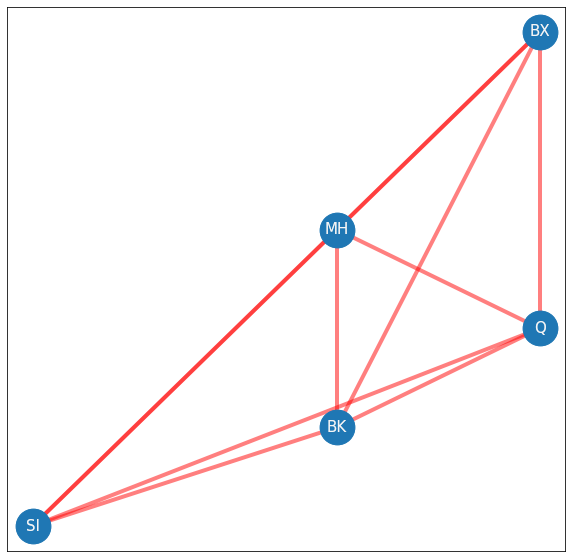

In [13]:
G_poss = nx.Graph()
G_node = nx.Graph()

nodes = {"SI": (1,1), "MH": (4,4), "BK": (2,2), "Q": (6,3), "BX": (6,6)}

for (node, posn) in nodes.items():
    G_poss.add_node(node, pos=posn)
    G_node.add_node(node, pos=posn)
node_keys = list(nodes.keys())

# add all possible combinations of nodes as red edges
for i, nodei in enumerate(node_keys):
    for j, nodej in enumerate(node_keys[i+1:]):
        G_poss.add_edge(nodei, nodej)


fig, ax = plt.subplots(1,1,figsize=(10,10))
nx.draw_networkx(G_poss, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="red", width=4, alpha=.5, arrows=False)
nx.draw_networkx(G_node, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", width=4, arrows=False)

Now, how many edges *actually* exist in your network? The sum of all of the entries of $A$ can be represented by the quantity $\sum_{i = 1}^n \sum_{j = 1}^n a_{ij}$. For each node $i$, we sum all of the $a_{ij}$, and then we add these across all of the nodes. Remember that $A$ is loopless, so you don't need to count the diagonal entries. This brings your quantity to $\sum_{i = 1}^n \sum_{i \neq j}a_{ij}$, since you don't need to count any edges along the diagonal of $A$. Next, remember that if an edge in $A$ exists between nodes $i$ and $j$, that *both* $a_{ij}$ and $a_{ji}$ take the value of $1$, due to the undirected property. To obtain the edge count of $A$, that you only need to count *either* $a_{ij}$ *or* $a_{ji}$. Somewhat arbitrarily in this book, you will always count the entries $a_{ij}$ in the upper triangle of $A$, which are the entries where $j > i$. This brings your quantity to $\sum_{i = 1}^n \sum_{j > i} a_{ij}$, which you can write $\sum_{j > i}a_{ij}$ for short. The edges in your network will be indicated with green in the following figure, of which there are $5$ total. Remember that the red edges were the *possible* edges:

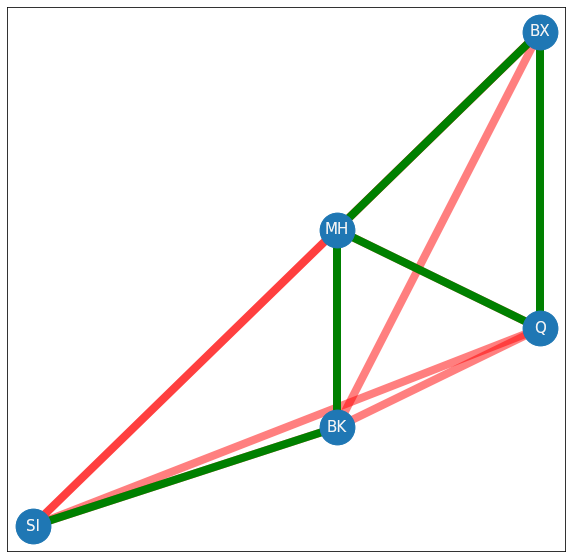

In [21]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

fig, ax = plt.subplots(1,1,figsize=(10,10))
nx.draw_networkx(G_poss, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="red", width=8, alpha=.5, arrows=False)

nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="green", width=8, arrows=False)

To put it all together, the **network density** indicates the *density of edges* which are present in the network. For a simple network, the network density can be defined as the ratio between the total number of edges in $A$ and the total number of edges possible in $A$:
\begin{align*}
    density(A) &= \frac{\sum_{j > i}a_{ij}}{\binom n 2} = \frac{2\sum_{j > i}a_{ij}}{n(n - 1)}
\end{align*}
In your example, this is simply the ratio of green edges which *actually* exist to red edges which could *possibly* exist, which is $\frac{5}{10} = 0.5$.

### The clustering coefficient indicates how much nodes tend to cluster together

The clustering coefficient inddicates the fraction of triplets of nodes which are closed. What the heck is that? Let's look at only Brooklyn, Manhattan, Queens, and the Bronx, and temporarily ignore Staten Island:

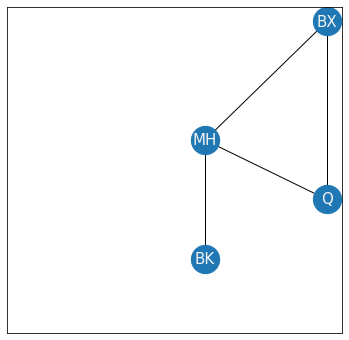

In [15]:
G_clus = nx.Graph()

G_clus.add_node("MH", pos=(4,4))
G_clus.add_node("BK", pos=(4,2))
G_clus.add_node("Q", pos=(6,3))
G_clus.add_node("BX", pos=(6,6))

G2 = nx.Graph()
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))
G2.add_node("SI", pos=(1,1))

pos = nx.get_node_attributes(G2, 'pos')
G_clus.add_edge("MH", "BX")
G_clus.add_edge("MH", "BK")
G_clus.add_edge("MH", "Q")
G_clus.add_edge("Q", "BX")


fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.draw_networkx(G_clus, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", alpha=0, arrows=False)

To begin to define the clustering coefficient, you first must understand what a *triplet* is. A **triplet** is an ordered tuple of three nodes which are connected by two or three edges. The triplets are *closed* if there are three edges, and *open* if there are only two edges. For instance, in the above network, you have the following triplets of nodes:
1. Open triplets between Bronx, Manhattan, and Brooklyn: (BX, MH, BK), (BX, BK, MH), (MH, BX, BK), (MH, BK, BX), (BK, BX, MH), (BK, MH, BX),
2. Open triplets between Manhattan, Queens, and Brooklyn: (MH, BK, Q), (MH, Q, BK), (BK, MH, Q), (BK, Q, MH), (Q, MH, BK), (Q, BK, MH),
3. Closed triplets between Bronx, Manhattan, and Queens: (BX, MH, Q), (BX, Q, MH), (MH, BX, Q), (MH, Q, BX), (Q, BX, MH), (Q, MH, BX),

No triplets are possible between Brooklyn, Bronx, and Queens, because only a single edge exists between the three of them. In your example, there are six closed triplets amongst the nodes (delineated in number 3. above), and there are twele open triplets (delineated in numbers 1. and 2. above). The global clustering coefficient is defined as:

\begin{align*}
    C &= \frac{\text{number of closed triplets}}{\text{number of closed triplets} + \text{number of open triplets}}
\end{align*}
In your example, this comes to $C = \frac{6}{6 + 12} = \frac{1}{3}$. This equation can also be understood in terms of the adjacency matrix. Note that if a triplet between nodes $i$, $j$, and $k$ is closed, then all three of the potential edges $a_{ij}$, $a_{jk}$, and $a_{ki}$ have a value of $1$. Therefore, if you could the number of times that $a_{ij}a_{jk}a_{ki} = 1$, you also count the number of closed triplets! This means that the number of closed triplets can be expressed as $\sum_{i,j,k}a_{ij}a_{jk}a_{ki}$. 

Further, note that for a given node $i$, you can find an arbitrary triplet (either open or closed) through the following procedure.
1. Pick a single neighbor $j$ for node $i$. Note that the node $i$ has a number of neighbors equal to $degree(i) = d_i$, so there are $d_i$ possible neighbors to choose from.
2. Pick a different neighbor $k$ for node $i$. Note that since node $i$ had $d_i$ neighbors, it has $d_i - 1$ neighbors that are not node $j$.
3. Since you know that nodes $j$ and $k$ are both neighbors of node $i$, you know that $a_{ij}$ and $a_{ik}$ both have values of one, and therefore the edges $(i, j)$ and $(i, k)$ exist. Therefore, the tuple of nodes $(i, j, k)$ is a triplet, because *at least* two edges exist amongst the three nodes. This tuple is closed if the edge $(j, k)$ exists, and open if the edge $(j, k)$ does not exist.
4. Therefore, there are $d_i (d_i - 1)$ triplets in which node $i$ is the leading node of the triplet.

As it turns out, since triplets are *ordered tuples*, you can repeat this procedure for all nodes, and if you count how many triplets you get in total, you get the *total number of triplets* for the entire network. Therefore, the number of open and closed triplets in the network is the quantity $\sum_i d_i (d_i - 1)$.  Then you could express the clustering coefficient in terms of the adjacency matrix as:

\begin{align*}
    C &= \frac{\sum_{i,j,k}a_{ij}a_{jk}a_{ki}}{\sum_i d_i (d_i - 1)}, \;\;\; d_i = degree(i)
\end{align*}
Which gives you an expression to implement programmatically.

### The path length describes how far two nodes are

How many bridges would you need to cross to get from Staten Island to Bronx? This concept relates directly to the concept of the *path length* in a network. A **path** between two nodes $i$ and $j$ is a sequence of edges which starts at node $i$, and traverses through other nodes in the network until reaching node $j$. Two nodes are described as **connected** if a path exists between them. The **path length** is the number of edges in the path. For instance, if you remember your network from the New York example, you could get from Staten Island to Bronx in two possible ways, indicated in green and blue in the following example:

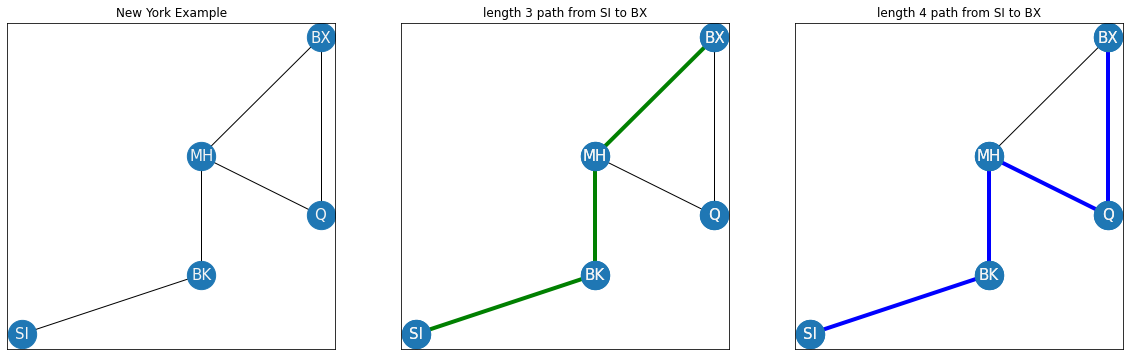

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
axs[0].set_title("New York Example")

G_short = nx.Graph()
G_short.add_node("MH", pos=(4,4))
G_short.add_node("BK", pos=(4,2))
G_short.add_node("Q", pos=(6,3))
G_short.add_node("BX", pos=(6,6))
G_short.add_node("SI", pos=(1,1))

G_short.add_edge("SI", "BK")
G_short.add_edge("MH", "BK")
G_short.add_edge("MH", "BX")

nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G_short, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", edge_color="green", width=4, arrows=False)
axs[1].set_title("length 3 path from SI to BX")

G_long = nx.Graph()
G_long.add_node("MH", pos=(4,4))
G_long.add_node("BK", pos=(4,2))
G_long.add_node("Q", pos=(6,3))
G_long.add_node("BX", pos=(6,6))
G_long.add_node("SI", pos=(1,1))

G_long.add_edge("SI", "BK")
G_long.add_edge("MH", "BK")
G_long.add_edge("MH", "Q")
G_long.add_edge("BX", "Q")

nx.draw_networkx(G, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G_long, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", edge_color="blue", width=4, arrows=False)
axs[2].set_title("length 4 path from SI to BX");

In this case, there are only two paths from SI to BX which do not visit the same node more than once, but in a larger network, there may be *many* possible paths from one node to another. For this reason, you will usually be interested in one particular path, the *shortest path*. The **shortest path** or **distance** between nodes $i$ and $j$ is the path with the smallest path length that connects nodes $i$ and $j$. In your example, the shortest path is indicated by the green edges, and the shortest path length is therefore three.  If it is not possible to get from node $i$ to node $j$ using edges of the network, the shortest path length is defined to be infinite. The shortest path between nodes $i$ and $j$ will often be abbreviated using the notation $l_{ij}$.

A common statistic is to view the *distance matrix* $L$, which is the $n \times n$ matrix whose entries $l_{ij}$ are the shortest path lengths between all pairs of nodes in the network. For your New York example, the distance matrix is:

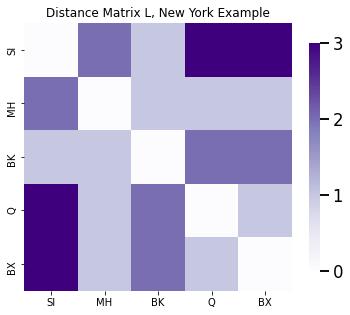

In [19]:
D = nx.floyd_warshall_numpy(G)

fig, ax = plt.subplots(1,1, figsize=(6,6))

heatmap(D, ax=ax, xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels([0, 1, 2, 3])
ax.set_title("Distance Matrix L, New York Example")
ax.set_xticklabels(["SI", "MH", "BK", "Q", "BX"])
ax.set_yticklabels(["SI", "MH", "BK", "Q", "BX"]);

Another common statistic you can compute using the distance matrix is the *average shortest path length*. The average shortest path length $l$ of a simple network is simply the average of all of the shortest paths between two distinct nodes $i$ and $j$ of the distance matrix:
\begin{align*}
    l &= \frac{1}{n(n - 1)}\sum_{i \neq j} l_{ij}
\end{align*}


## Subnetworks are subsets of larger networks

When you think of an entire network, it is often useful to consider it in smaller bits. For instance, when you were looking at the clustering coefficient, you found it useful to break out the nodes {BK, Q, BX, MH} so you could count triplets:

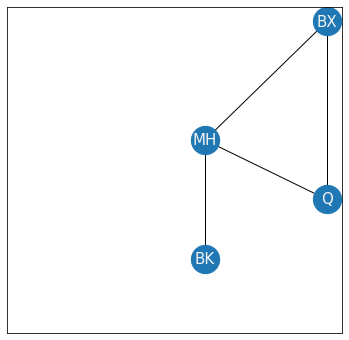

In [20]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

G2 = nx.Graph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G2, 'pos')
G2.add_edge("SI", "BK")
G2.add_edge("MH", "BK")
G2.add_edge("MH", "Q")
G2.add_edge("MH", "BX")
nx.draw_networkx(G_clus, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
G2.add_edge("Q", "BX")
nx.draw_networkx(G2, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", alpha=0.0, arrows=False)

This portion of the network is called a *subnetwork*. A **subnetwork** is a network topology whose nodes and edges are *subsets* of the nodes and edges for another network topology. In this case, the  network toplogy of the New York example is $(\mathcal V, \mathcal E)$ defined by the sets:

+ The nodes $V$: $\{SI, BK, Q, MH, BX\}$,
+ The edges $E$: $\left\{(SI, BK), (BK, MH), (MH, Q), (MH, BX), (Q, BX)\right\}$.

and the subnetwork (which removed Staten Island SI) we looked at above is the network:

+ The nodes $V_s$: $\{BK, Q, MH, BX\}$,
+ The edges $E_s$: $\left\{(BK, MH), (MH, Q), (MH, BX), (Q, BX)\right\}$.

As you can see, the subnetwork with nodes and edges $(V_s, E_s)$ is such that every element in $V_s$ is an element of $V$, and therefore the nodes of the subnetwork are a subset of the nodes of the complete network. Further, every element in $E_s$ is an element of $E$, and therefore the edges of the subnetwork are a subset of the edges of the complete network. So the subnetwork $(V_s, E_s)$ is a subnetwork of the network $(V, E)$. This particular subnetwork can be described further as an **induced** subnetwork. A subnetwork of a network is **induced** by a set of nodes if the following conditions hold:

1. The nodes $V_s$ are a subset of the nodes of the network $V$,
2. The edges $E_s$ consist of *all* of the edges from the original network where both of the corresponding nodes are in $V_s$. 

To see an example of a subnetwork which is *not* an induced subnetwork, you can consider a subnetwork which removes one of the edges that exist in the induced subnetwork network:

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
axs[0].set_title("Network Topology, New York Example")
nx.draw_networkx(G_clus, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", alpha=0.0, arrows=False)
axs[1].set_title("Induced Subnetwork")
G_clus.remove_edge("MH", "BX")
nx.draw_networkx(G_clus, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G2, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", alpha=0.0, arrows=False)
axs[2].set_title("Subnetwork which is not an induced subnetwork");

A particular induced subnetwork that you will often be concerned with is known as the largest connected component (LCC). 

### The largest connected component (LCC) is the largest subnetwork of connected nodes

To define the largest connected component, you'll need to modify your example slightly. Let's say your network also includes the Boston area (red nodes), and you have two new nodes, Boston (BO) and Cambridge (CA). Boston and Cambridge have several bridges between one another, so an edge exists between them. However, there are no bridges between boroughs of New York and the Boston area, so there are no edges from nodes in the Boston area to nodes in the New York area:

In [ ]:
G_bos = nx.Graph()
G_bos.add_node("BO", pos=(8, 6))
G_bos.add_node("CA", pos=(8, 8))
G_bos.add_edge("BO", "CA")

pos_bos = nx.get_node_attributes(G_bos, 'pos')
fig, ax = plt.subplots(1,1, figsize=(6, 6))

nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)

nx.draw_networkx(G_bos, pos_bos, ax=ax, with_labels=True, node_color="tab:red", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
ax.set_title("Bridge Network Topology, Boston + New York");

The entire network can be described by the sets:
+ $\mathcal V = \{SI, MH, BK, BX, Q, CA, BO\}$,
+ $\mathcal E = \{(SI, BK), (MH, BK), (MH, Q), (MH, BX), (MX, Q), (CA, BO)\}$.

Notice that you have two distinct sets of nodes, those of New York and those of Boston, which are *only* connected amongst one another. Formally, these two sets of nodes can be described as inducing *connected components* of the network topology $(\mathcal V, \mathcal E)$. A **connected component** is an induced subnetwork in which any two nodes are connected to each other by a path through the network. The two connected components are the New York induced subnetwork:

+ The nodes $\mathcal V_N$: $\{SI, BK, Q, MH, BX\}$,
+ The edges $\mathcal E_N$: $\left\{(SI, BK), (BK, MH), (MH, Q), (MH, BX), (Q, BX)\right\}$.

and the Boston induced subnetwork:
+ The nodes $\mathcal V_B$: $\{CA, BO\}$,
+ The edges $\mathcal E_B$: $\left\{(CA, BO)\right\}$.

which you can represent visually here:

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G_bos, pos_bos, ax=axs[0], with_labels=True, node_color="tab:red", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
axs[0].set_title("New York + Boston Network Topology")

nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
nx.draw_networkx(G_bos, pos_bos, ax=axs[1], with_labels=True, node_color="tab:red", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False, alpha=0.0)
axs[1].set_title("New York Induced Subnetwork Topology")


nx.draw_networkx(G, pos, ax=axs[2], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False, alpha=0.0)
nx.draw_networkx(G_bos, pos_bos, ax=axs[2], with_labels=True, node_color="tab:red", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=False)
axs[2].set_title("Boston Induced Subnetwork Topology");

The **largest connected component** (LCC) of a network is the connected component with the most nodes. In your example, the New York connected component has five nodes, whereas the Bosston connected component has two nodes. Therefore, the New York connected component is the LCC of this simple network.